## Importing Libraries and Dataset

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
colors = ['#97C1A9', '#B98FD1']
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')


In [334]:
df_train=pd.read_csv(r"D:\PROJECTS\20230606_Financial Inclusion in Africa\datasets\Train.csv")
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [413]:
df_test=pd.read_csv(r"D:\PROJECTS\20230606_Financial Inclusion in Africa\datasets\Test.csv")
df_test.head()
#df_testcopy=df_test.copy()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


## Data Info

In [337]:
df_train.shape

(23524, 13)

In [338]:
df_test.shape

(10086, 12)

In [339]:
df_train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [340]:
df_train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [341]:
col=list(df_train.columns)
categorical_features=[]
numerical_features=[]
for i in col:
    if len(df_train[i].unique())>6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features : ',*categorical_features)
print('Numerical Features : ',*numerical_features)

Categorical Features :  country year bank_account location_type cellphone_access gender_of_respondent relationship_with_head marital_status education_level
Numerical Features :  uniqueid household_size age_of_respondent job_type


## Exploratory Data Analysis

                                             |          | [  0%]   00:00 -> (? left)


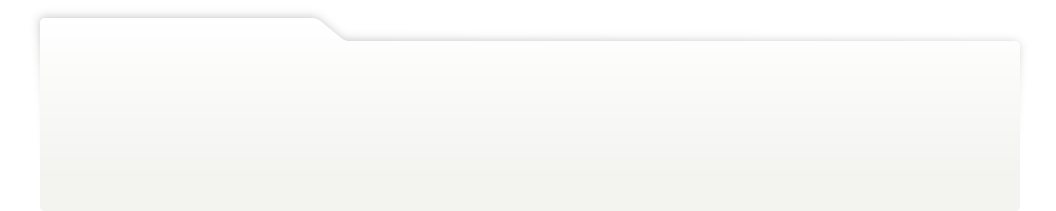
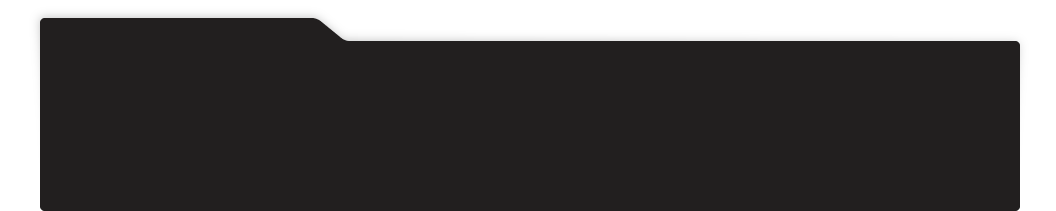
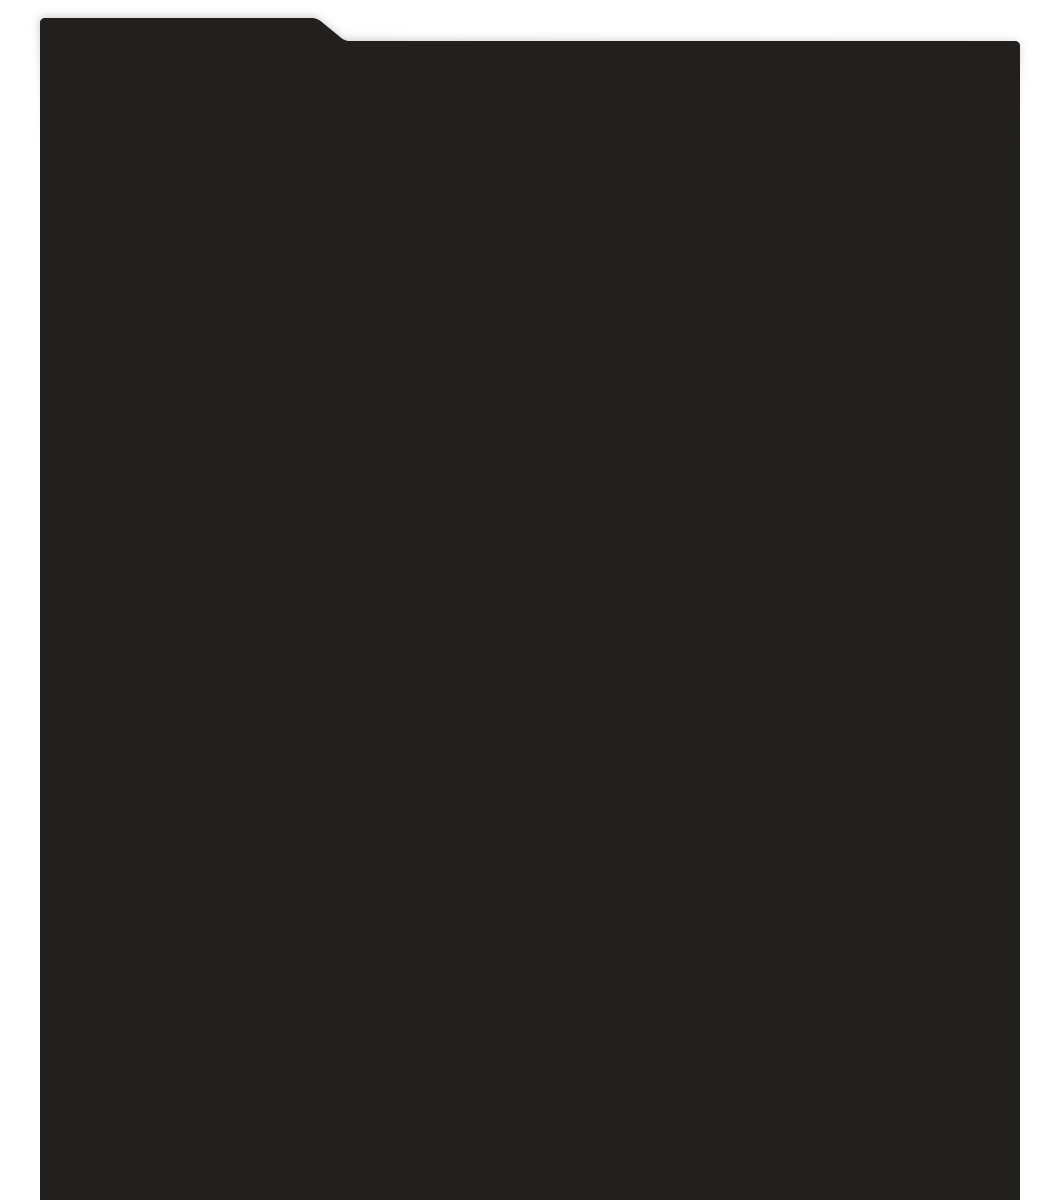
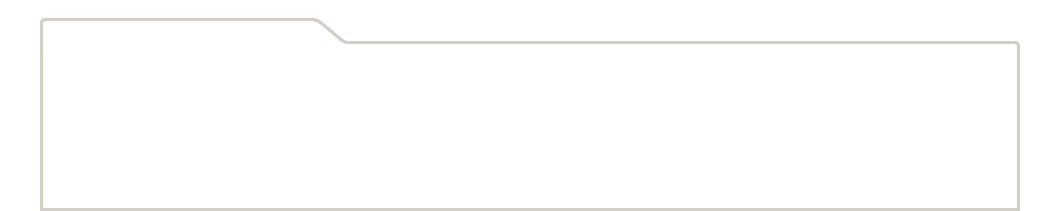
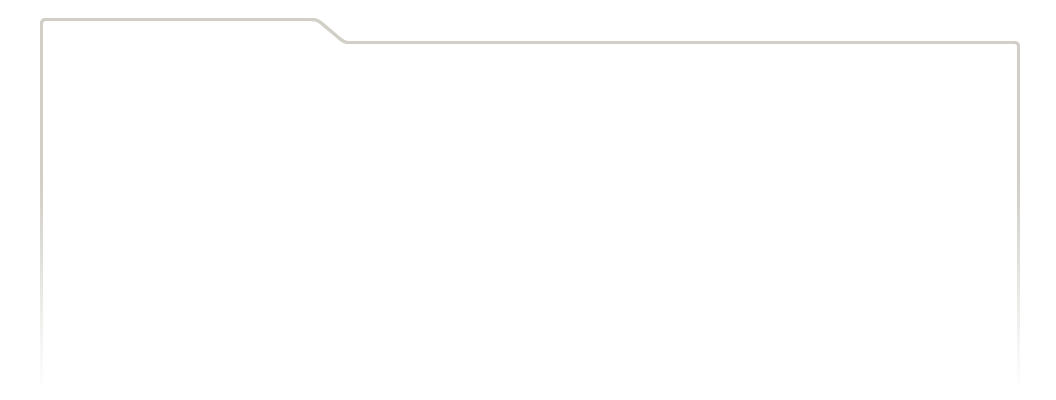
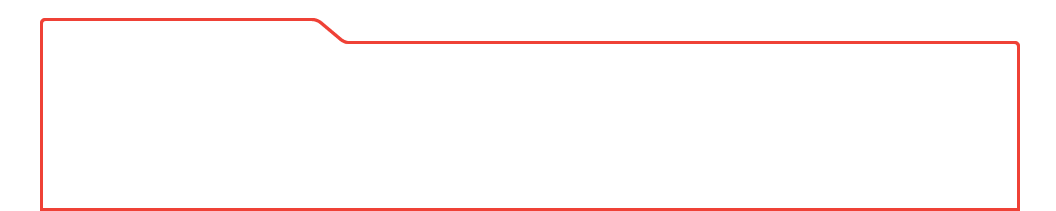
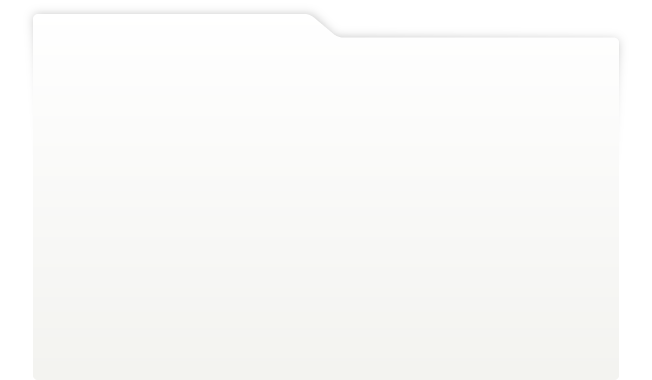
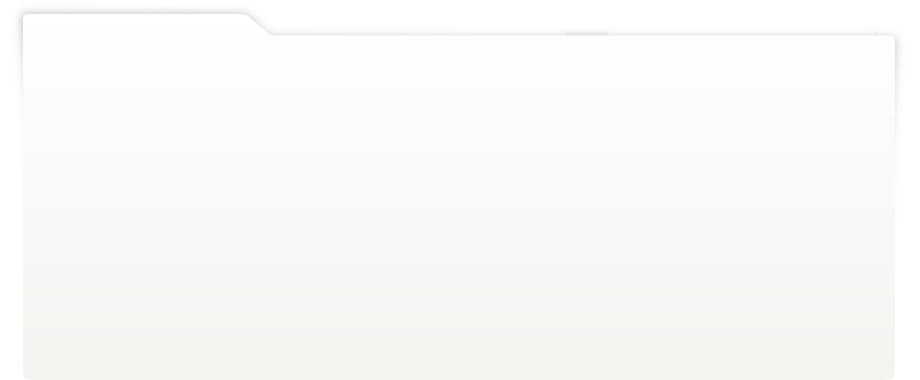
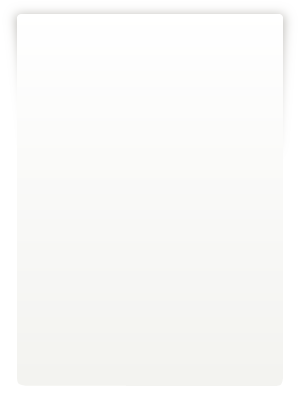
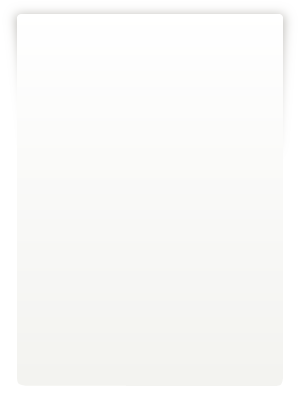
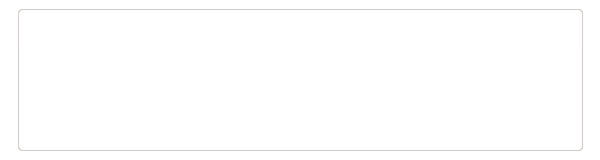
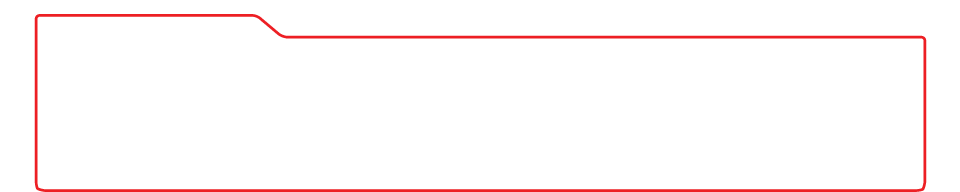
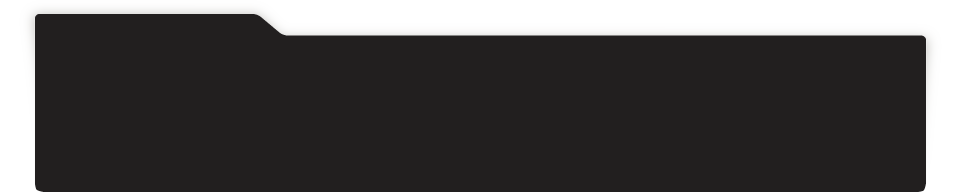
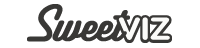
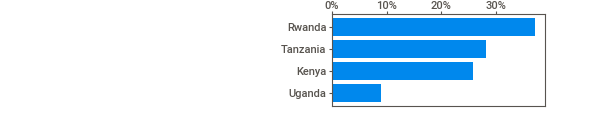
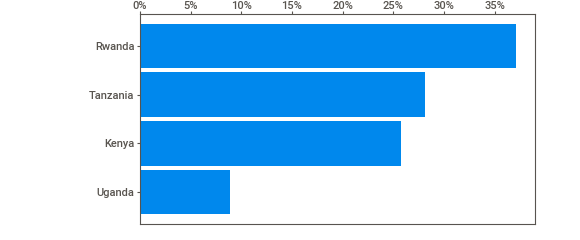
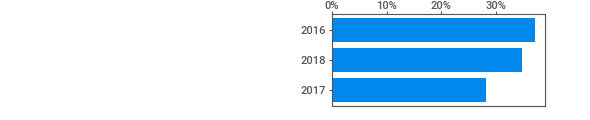
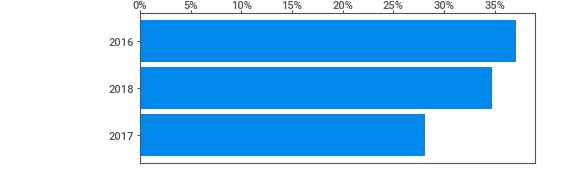
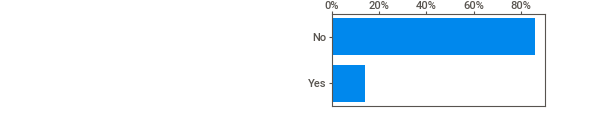
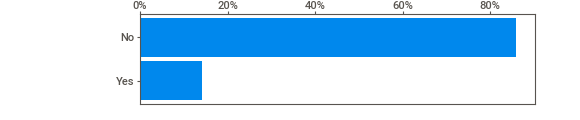
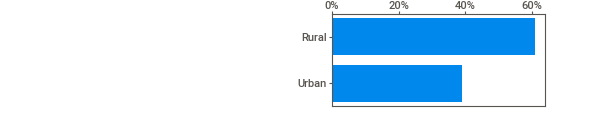
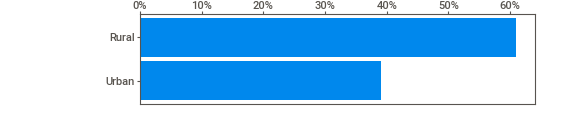
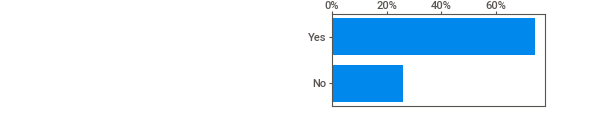
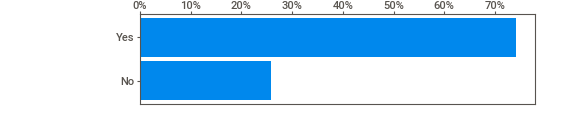
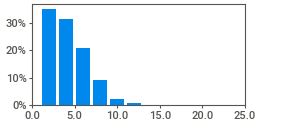
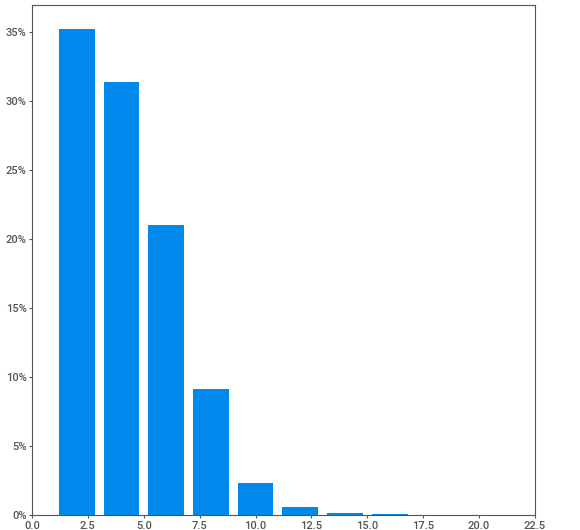
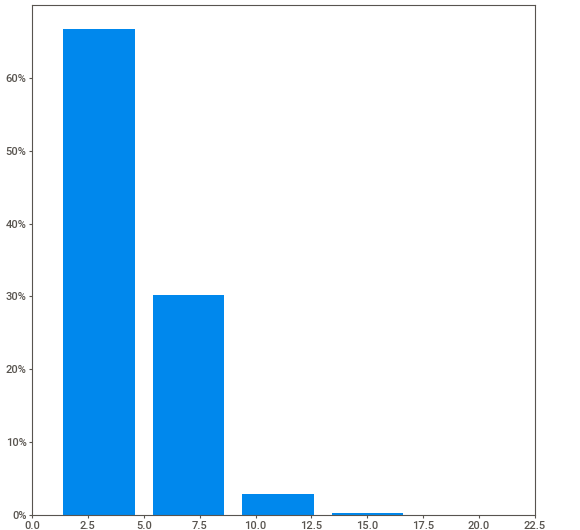
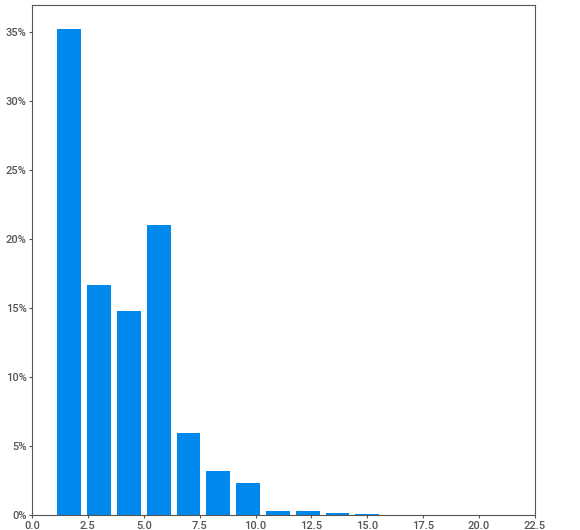
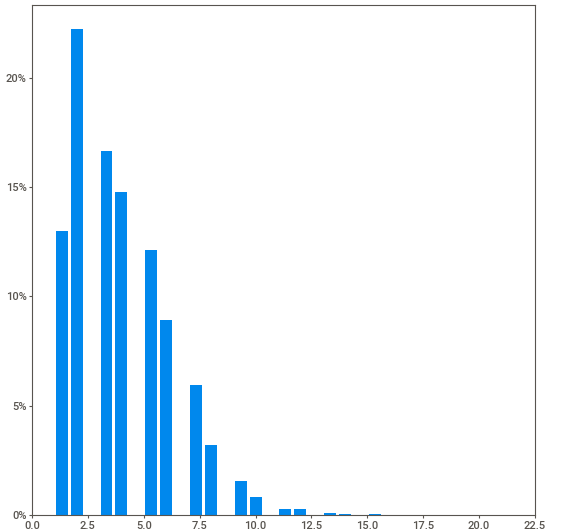
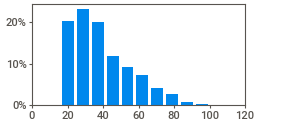
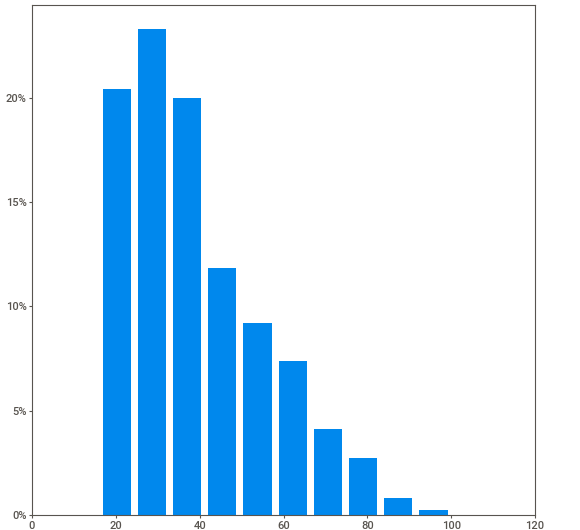
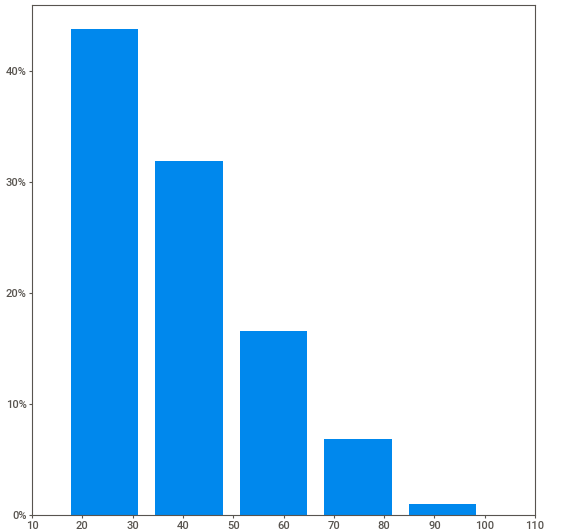
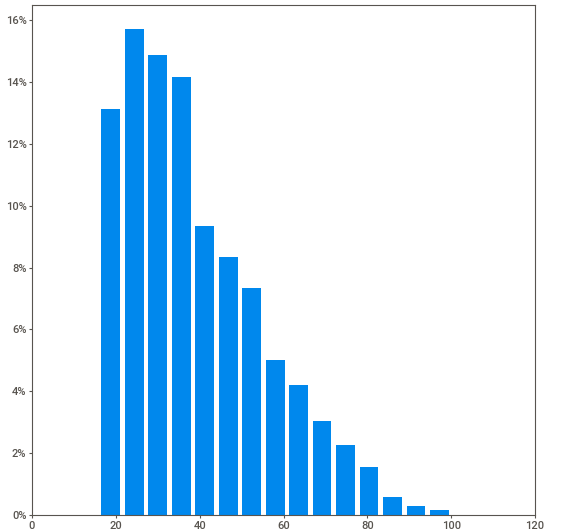
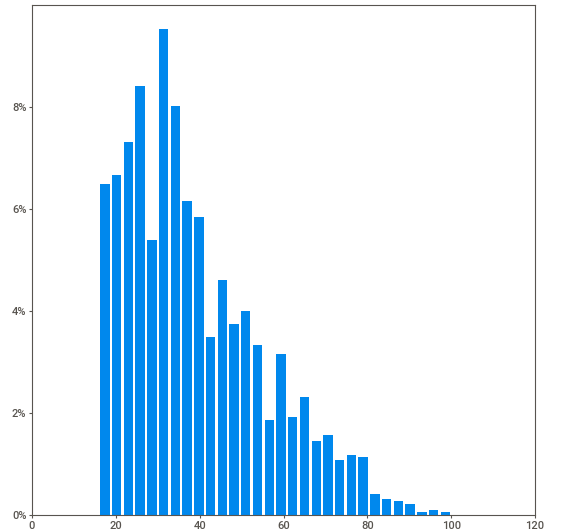
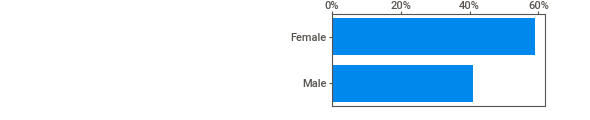
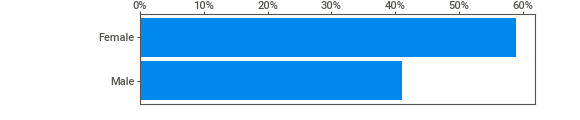
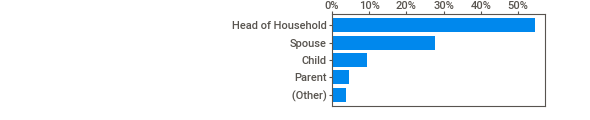
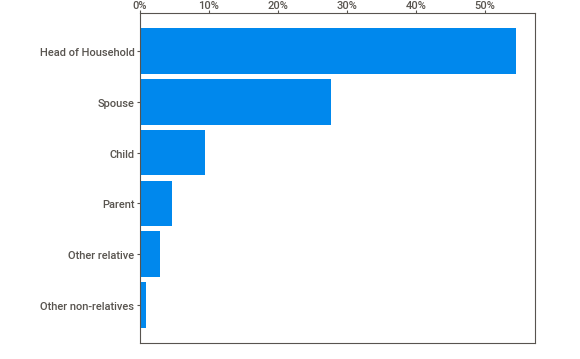
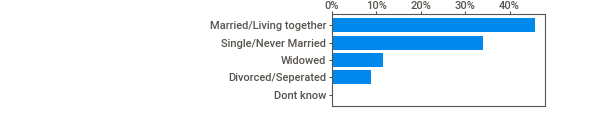
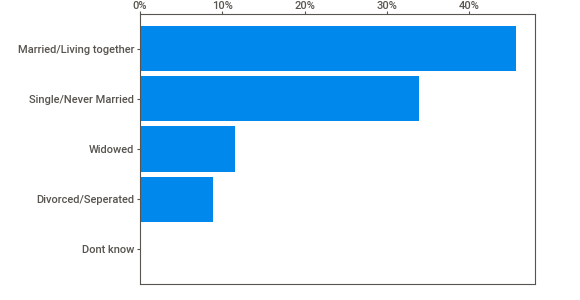
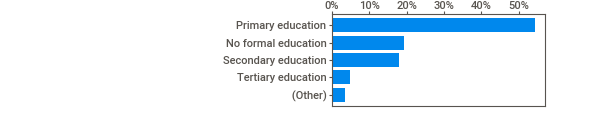
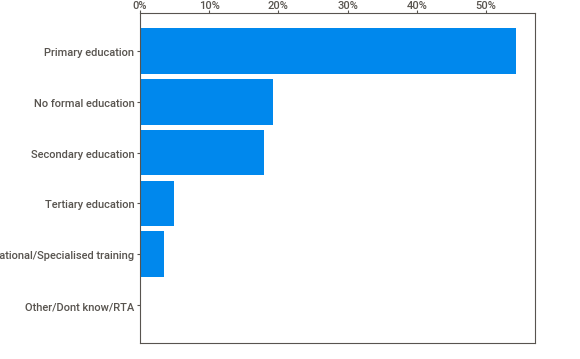
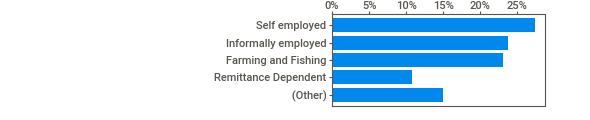
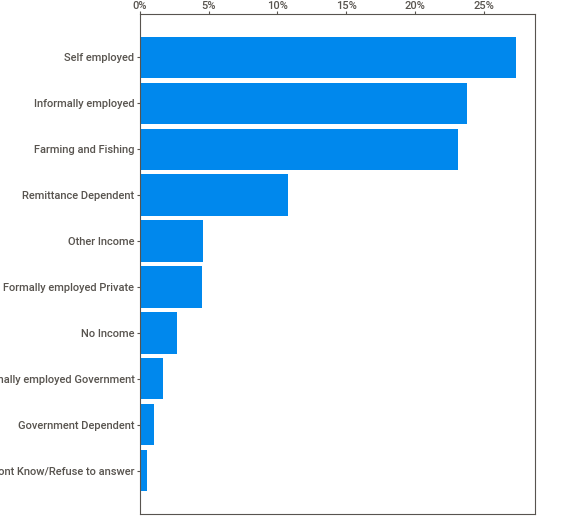
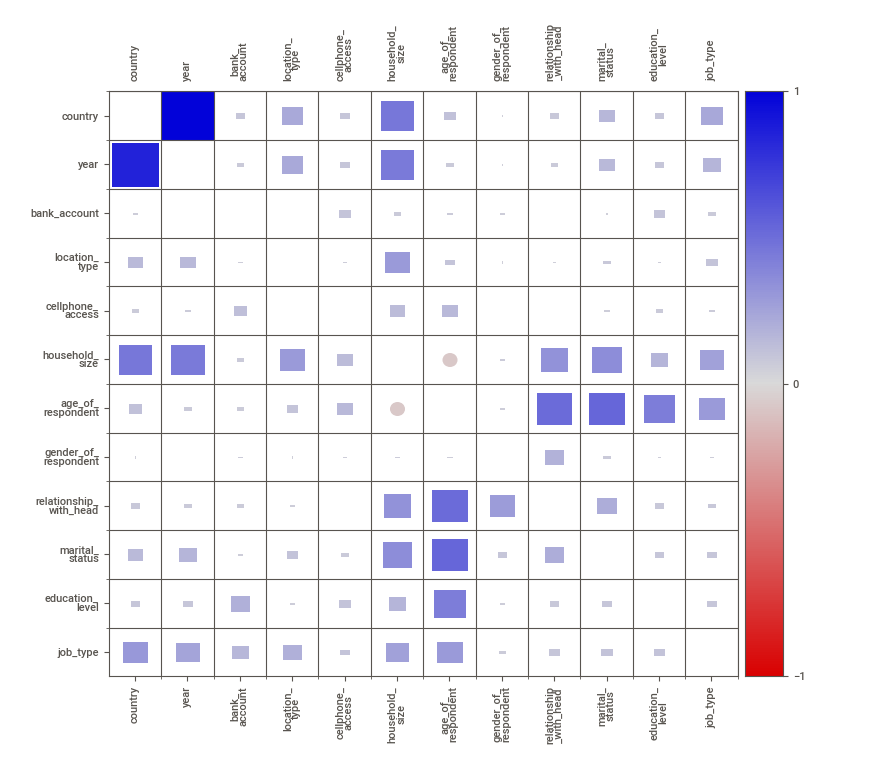
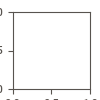

In [311]:
import sweetviz
autoEDA=sweetviz.analyze(df_train)
autoEDA.show_notebook()

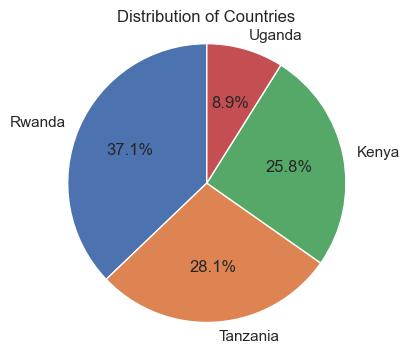

In [380]:
#distribution of countries
country_counts = df_train['country'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Countries')
plt.show()

In [347]:
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


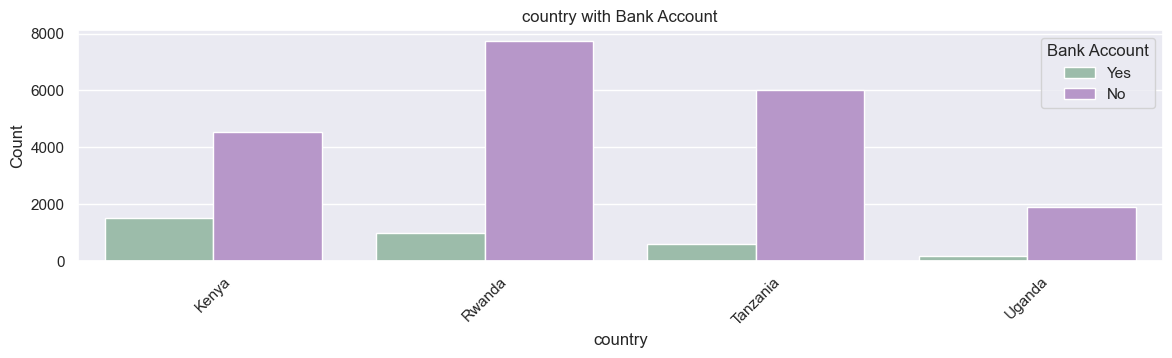

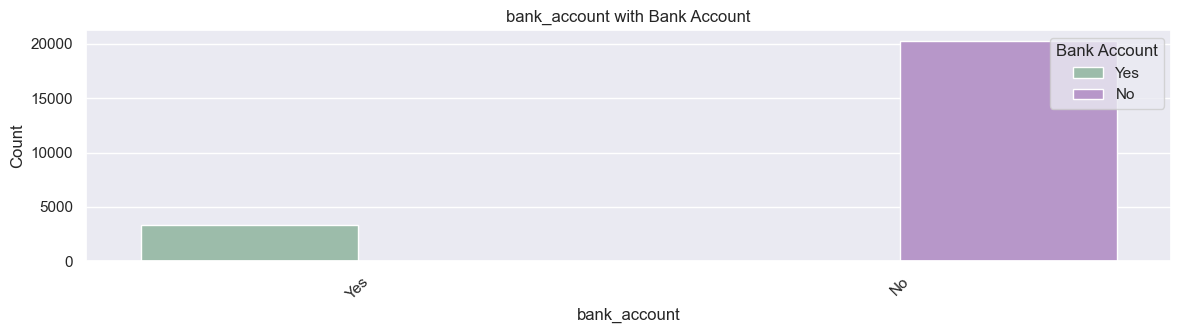

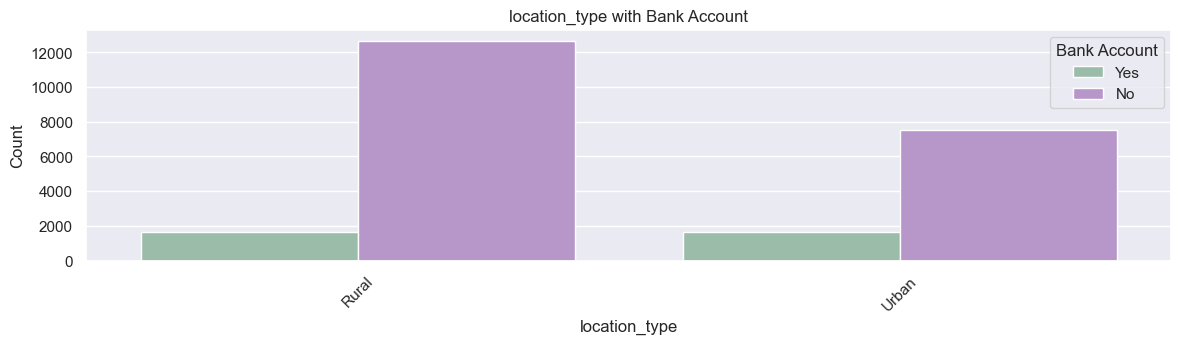

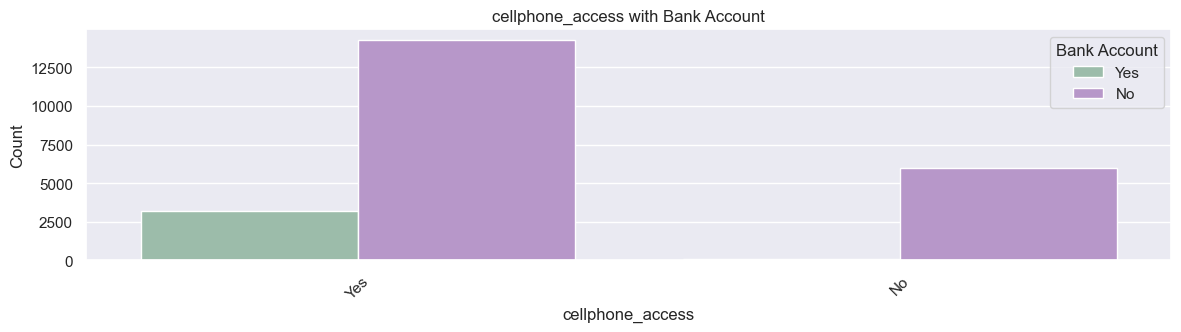

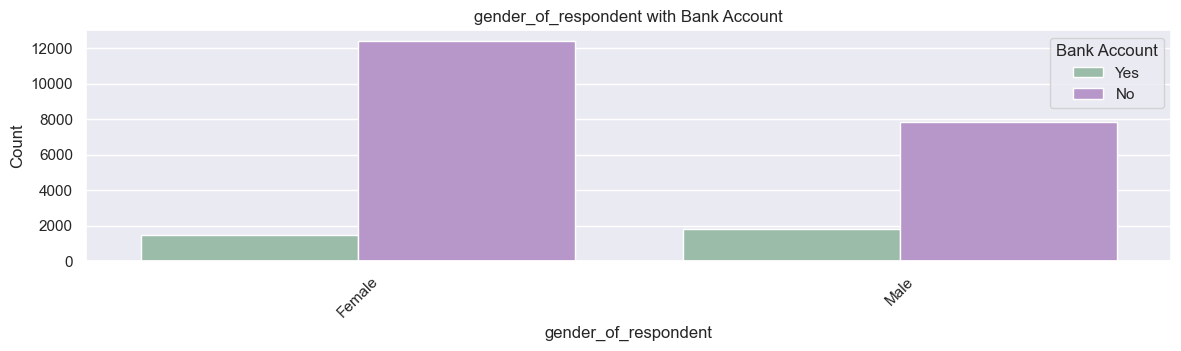

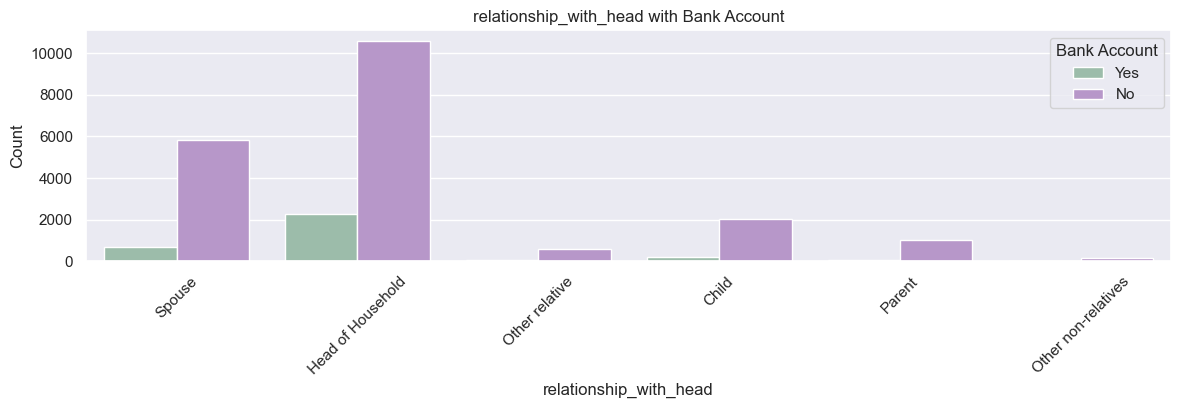

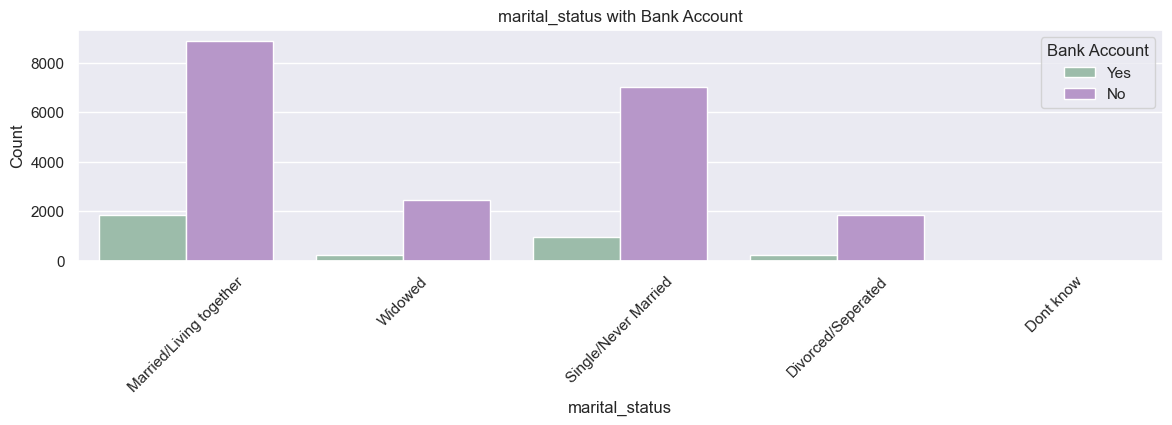

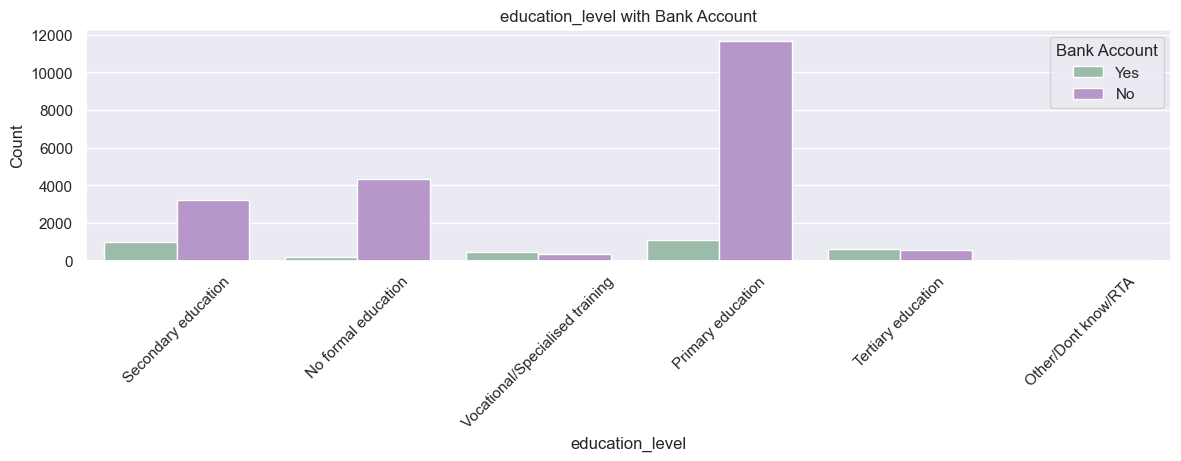

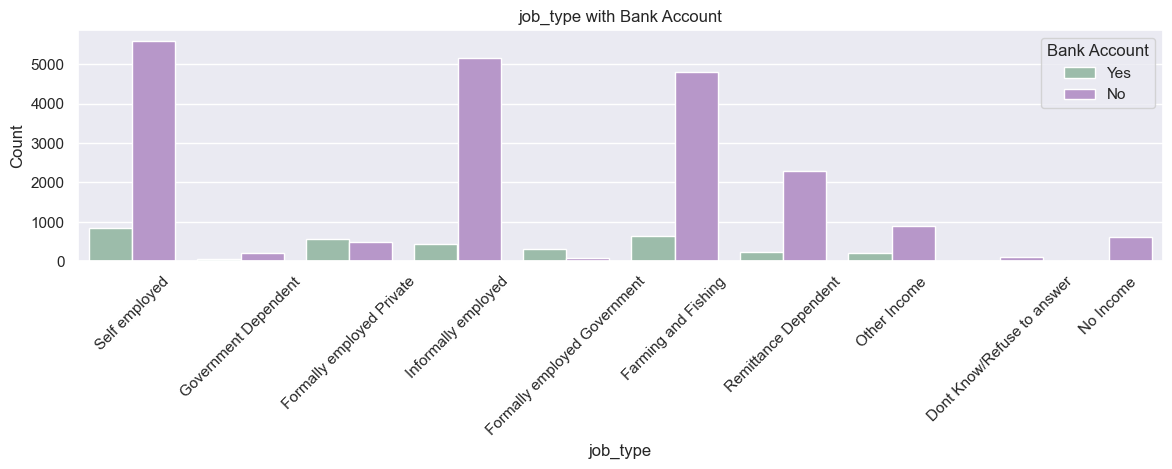

In [352]:
# Filter object columns
object_columns = df_train.select_dtypes(include='object').columns.drop('uniqueid')

# Create count plots for object columns with hue='bank account'
for column in object_columns:
    plt.figure(figsize=(14, 3))  # Set the figure size
    sns.countplot(data=df_train, x=column, palette=colors, hue='bank_account')
    plt.title(f'{column} with Bank Account')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend(title='Bank Account', loc='upper right')
    plt.show()


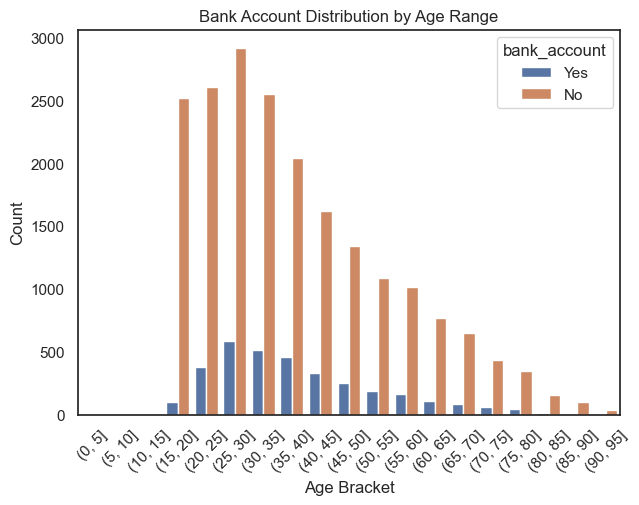

In [382]:
# Group age into ranges of five
df_train['age_range'] = pd.cut(df_train['age_of_respondent'], bins=range(0,100, 5))

# Countplot with hue
plt.figure(figsize=(7,5))
sns.countplot(data=df_train, x='age_range', hue='bank_account')
plt.title('Bank Account Distribution by Age Range')
plt.xlabel('Age Bracket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


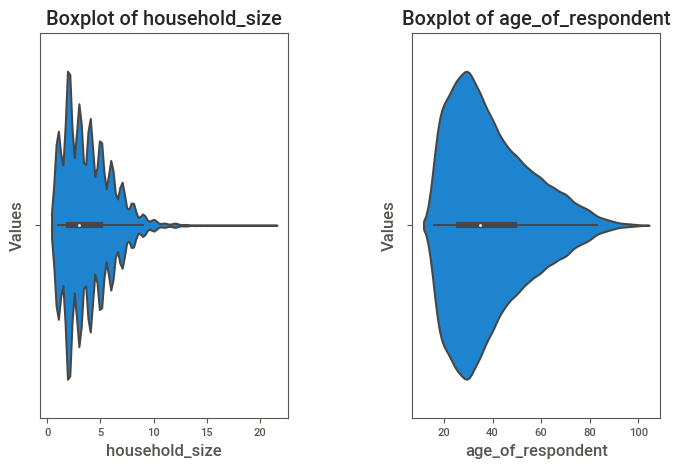

In [316]:
# Select numeric variables
numeric_vars = ['household_size', 'age_of_respondent']

# Define the number of rows and columns
n_rows = 1
n_cols = len(numeric_vars)

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8,5))

# Flatten the axes if necessary
if n_rows == 1 and n_cols == 1:
    axes = [axes]

# Create boxplots
for i, var in enumerate(numeric_vars):
    sns.violinplot(x=var, data=df_train, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Values')

# Adjust the layout
plt.subplots_adjust(wspace=0.5)

# Show the plots
plt.show()

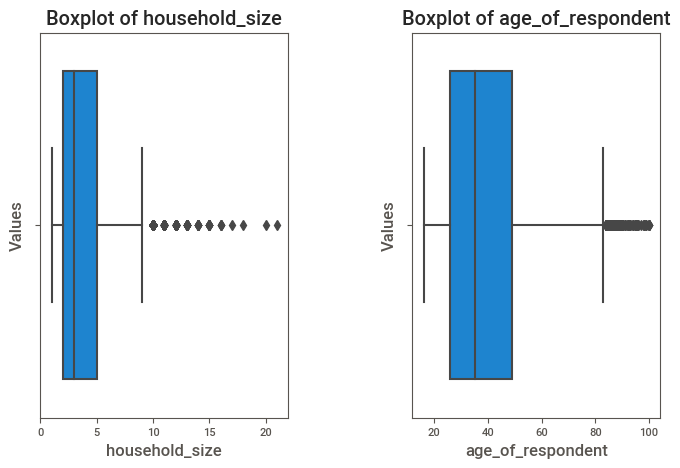

In [317]:
# Select numeric variables
numeric_vars = ['household_size', 'age_of_respondent']

# Define the number of rows and columns
n_rows = 1
n_cols = len(numeric_vars)

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8,5))

# Flatten the axes if necessary
if n_rows == 1 and n_cols == 1:
    axes = [axes]

# Create boxplots
for i, var in enumerate(numeric_vars):
    sns.boxplot(x=var, data=df_train, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Values')

# Adjust the layout
plt.subplots_adjust(wspace=0.5)

# Show the plots
plt.show()


There seems to be some outliers in our data. We will see what to do with them.

Text(0.5, 0.98, 'Bank Account')

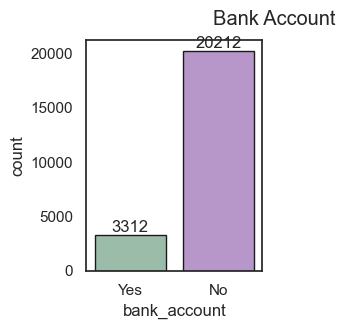

In [354]:
sns.set(style='white')

# Plot histograms
plt.subplot(1,2,1)
ax=sns.countplot(data=df_train,x='bank_account',palette=colors,edgecolor='k')
ax.bar_label(ax.containers[0]) #used to add labels to the bars based on their heights
plt.suptitle('Bank Account')


The y feature is very imbalanced. We will need to balance the target variable.

In [363]:
df_train_copy.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [365]:
df_train_copy.dtypes

country                   object
year                       int64
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

## Data Preprocessing

In [ ]:
df_train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_range
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,"(20, 25]"
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,"(65, 70]"
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,"(25, 30]"
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,"(30, 35]"
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,"(25, 30]"


In [ ]:
#let's make copies of our data
df_train_copy=df_train.copy()
df_test_copy=df_test.copy()

In [359]:
df_train_copy.drop(columns='age_range', axis=1,inplace=True)

In [360]:
df_train_copy.isnull().sum()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Preprocessing the training dataset

In [368]:
#label encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Identify object columns in the dataframe
object_cols = df_train_copy.select_dtypes(include=['object']).columns

# Create a dictionary to store the label encoder for each column
label_encoders = {}

# Label encode object columns
for col in object_cols:
    le = LabelEncoder()
    df_train_copy[col] = le.fit_transform(df_train_copy[col])
    label_encoders[col] = le

# Print the mapping between original values and encoded values
for col, le in label_encoders.items():
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")


country: {'Kenya': 0, 'Rwanda': 1, 'Tanzania': 2, 'Uganda': 3}
bank_account: {'No': 0, 'Yes': 1}
location_type: {'Rural': 0, 'Urban': 1}
cellphone_access: {'No': 0, 'Yes': 1}
gender_of_respondent: {'Female': 0, 'Male': 1}
relationship_with_head: {'Child': 0, 'Head of Household': 1, 'Other non-relatives': 2, 'Other relative': 3, 'Parent': 4, 'Spouse': 5}
marital_status: {'Divorced/Seperated': 0, 'Dont know': 1, 'Married/Living together': 2, 'Single/Never Married': 3, 'Widowed': 4}
education_level: {'No formal education': 0, 'Other/Dont know/RTA': 1, 'Primary education': 2, 'Secondary education': 3, 'Tertiary education': 4, 'Vocational/Specialised training': 5}
job_type: {'Dont Know/Refuse to answer': 0, 'Farming and Fishing': 1, 'Formally employed Government': 2, 'Formally employed Private': 3, 'Government Dependent': 4, 'Informally employed': 5, 'No Income': 6, 'Other Income': 7, 'Remittance Dependent': 8, 'Self employed': 9}


In [369]:
df_train_copy['year'] = le.fit_transform(df_train_copy['year'])

# Print the mapping of original labels to encoded labels
print('Label Mapping:')
for i, label in enumerate(le.classes_):
    print(f'{label} -> {i}')

Label Mapping:
2016 -> 0
2017 -> 1
2018 -> 2


In [370]:
#scaling our age column
df_train_copy['age_of_respondent']=df_train_copy['age_of_respondent']/100


In [371]:
df_train_copy.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,1,0,1,3,0.24,0,5,2,3,9
1,0,2,0,0,0,5,0.70,0,1,4,0,4
2,0,2,1,1,1,5,0.26,1,3,3,5,9
3,0,2,0,0,1,5,0.34,0,1,2,2,3
4,0,2,0,1,0,8,0.26,1,0,3,2,5


Preprocessing the test dataset

In [386]:
def preprocessing_data(df_test):
    # Identify object columns in the dataframe
    object_cols = df_test.select_dtypes(include=['object']).columns

    # Create a dictionary to store the label encoder for each column
    label_encoders = {}

    # Label encode object columns
    for col in object_cols:
        le = LabelEncoder()
        df_test[col] = le.fit_transform(df_test[col])
        label_encoders[col] = le

    # Drop the "uniqueid" column if present
    if "uniqueid" in df_test.columns:
        df_test = df_test.drop(["uniqueid"], axis=1)

    # Scale the "age_of_respondent" column into the range of 0 and 1
    df_test['age_of_respondent'] = df_test['age_of_respondent'] / 100

    return df_test

df_test_processed = preprocessing_data(df_test)


In [388]:
df_test_processed['year'] = le.fit_transform(df_test_processed['year'])

# Print the mapping of original labels to encoded labels
print('Label Mapping:')
for i, label in enumerate(le.classes_):
    print(f'{label} -> {i}')

Label Mapping:
2016 -> 0
2017 -> 1
2018 -> 2


In [389]:
df_test_processed.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,1,1,3,0.30,1,1,2,3,2
1,0,2,1,1,7,0.51,1,1,2,5,3
2,0,2,0,0,3,0.77,0,4,2,0,8
3,0,2,0,0,6,0.39,0,1,2,2,8
4,0,2,1,0,3,0.16,1,0,3,3,8


In [391]:
df_test_processed.columns

Index(['country', 'year', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [395]:
df_test_final=df_test_processed

Correlation

Text(0.5, 1.0, 'Owning a Bank account Correlation')

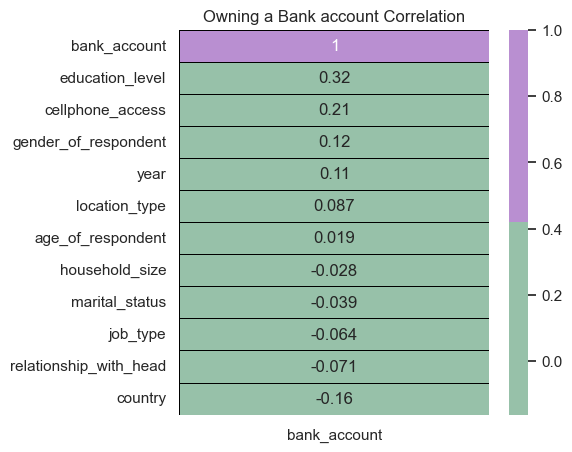

In [375]:
#correlation
corr=df_train_copy.corrwith(df_train_copy['bank_account']).sort_values(ascending=False).to_frame()
corr.columns = ['bank_account']

plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,cmap=colors,linewidths=0.4,linecolor='black')

plt.title("Owning a Bank account Correlation")

Handling imbalanced target variable

In [ ]:
# let's move our target column to be at the very end
# Remove the target column and store it in a separate variable
bank_account = df_train_copy.pop('bank_account')

# Insert the target column at the end
df_train_copy.insert(len(df_train_copy.columns), 'bank_account', bank_account)


In [ ]:
df_train_copy['bank_account'].value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate data for each class
class_0 = df_train_copy[df_train_copy['bank_account'] == 0]
class_1 = df_train_copy[df_train_copy['bank_account'] == 1]


# Determine the size of the majority class
majority_size = max(len(class_0), len(class_1))

# Random oversample the minority classes
class_0_oversampled = resample(class_0, replace=True, n_samples=majority_size, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=majority_size, random_state=42)


# Combine the balanced classes
df_train_balanced = pd.concat([class_0_oversampled, class_1_oversampled])

# Check the class distribution in the balanced dataframe
print(df_train_balanced['bank_account'].value_counts())

0    20212
1    20212
Name: bank_account, dtype: int64


Handling outliers using Winsorized method

In [ ]:
from scipy.stats import mstats

# Winsorize 'household_size' column
household_size_winsorized = mstats.winsorize(df_train_balanced['household_size'], limits=[0.05, 0.05])

# Replace original values with Winsorized values
df_train_balanced['household_size'] = household_size_winsorized

# Winsorize 'age_of_respondent' column
age_of_respondent_winsorized = mstats.winsorize(df_train_balanced['age_of_respondent'], limits=[0.05, 0.05])

# Replace original values with Winsorized values
df_train_balanced['age_of_respondent'] = age_of_respondent_winsorized


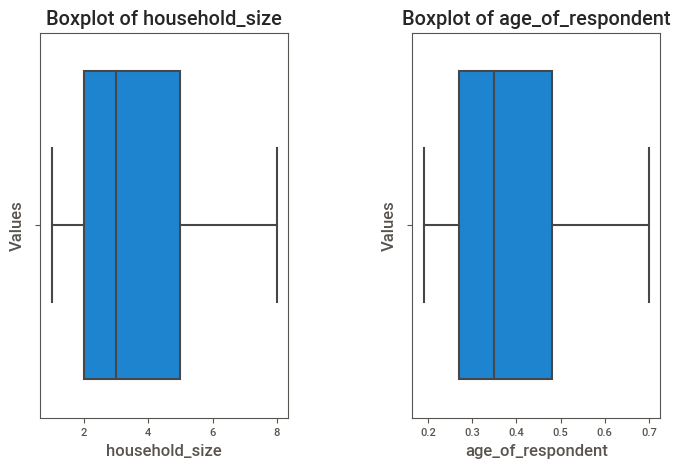

In [ ]:
# Select numeric variables
numeric_vars = ['household_size', 'age_of_respondent']

# Define the number of rows and columns
n_rows = 1
n_cols = len(numeric_vars)

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8,5))

# Flatten the axes if necessary
if n_rows == 1 and n_cols == 1:
    axes = [axes]

# Create boxplots
for i, var in enumerate(numeric_vars):
    sns.boxplot(x=var, data=df_train_balanced, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Values')

# Adjust the layout
plt.subplots_adjust(wspace=0.5)

# Show the plots
plt.show()

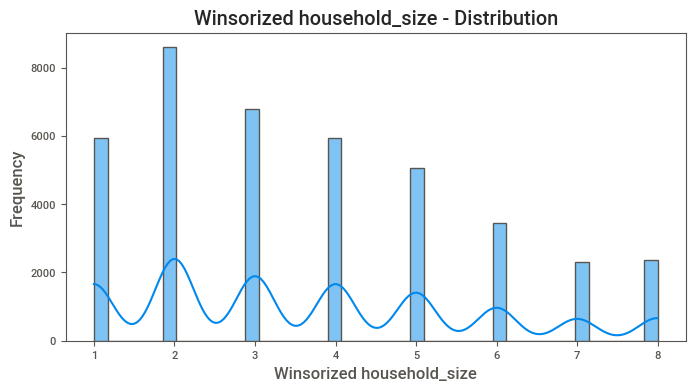

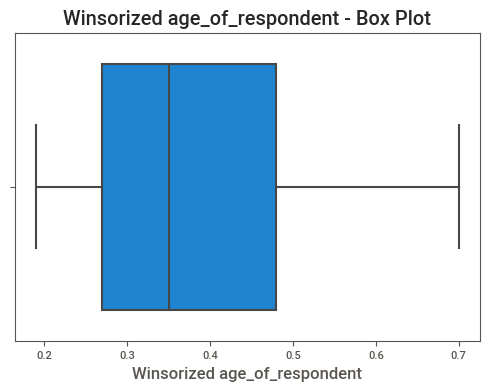

In [ ]:
# Histogram of Winsorized 'household_size' column
plt.figure(figsize=(8, 4))
sns.histplot(df_train_balanced['household_size'], kde=True)
plt.title("Winsorized household_size - Distribution")
plt.xlabel("Winsorized household_size")
plt.ylabel("Frequency")
plt.show()

# Box plot of Winsorized 'age_of_respondent' column
plt.figure(figsize=(6, 4))
sns.boxplot(df_train_balanced['age_of_respondent'])
plt.title("Winsorized age_of_respondent - Box Plot")
plt.xlabel("Winsorized age_of_respondent")
plt.show()

## Model Building

Train Test Split

In [ ]:
df_train_final=df_train_balanced

X = df_train_final.drop('bank_account', axis=1)
y = df_train_final['bank_account']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,cross_val_score,cross_val_predict,KFold,cross_validate
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, f1_score

In [430]:
def model(classifier, X_train, y_train, X_test, y_test):
    sns.set(rc={'figure.figsize': (5, 3)})
    sns.set(style='whitegrid')
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score: ", '{0:.2%}'.format(cross_val_score(classifier, X_train, y_train).mean()))
    print("ROC_AUC Score: ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))

    # Call model_evaluation with the classifier and y_test
    model_evaluation(classifier, X_test, y_test)

def model_evaluation(classifier, X_test, y_test):
    # confusion matrix
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    incorrect_percentage = (cm[0][1] + cm[1][0]) / np.sum(cm)
    print("Incorrect Percentage: ", '{0:.2%}'.format(incorrect_percentage))

    # classification report
    print(classification_report(y_test, classifier.predict(X_test)))


XGB Classifier

In [431]:
classifier_xgb=XGBClassifier(random_state=1)

model(classifier_xgb, X_train, y_train, X_test, y_test)
model_evaluation(classifier_xgb,X_test,y_test)

Cross Validation Score:  86.24%
ROC_AUC Score:  86.28%
Incorrect Percentage:  13.72%
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4031
           1       0.85      0.89      0.87      4054

    accuracy                           0.86      8085
   macro avg       0.86      0.86      0.86      8085
weighted avg       0.86      0.86      0.86      8085

Incorrect Percentage:  13.72%
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4031
           1       0.85      0.89      0.87      4054

    accuracy                           0.86      8085
   macro avg       0.86      0.86      0.86      8085
weighted avg       0.86      0.86      0.86      8085



RandomForest Classifier

In [432]:
classifier_rfc=RandomForestClassifier(random_state=1)

model(classifier_rfc, X_train, y_train, X_test, y_test)
model_evaluation(classifier_rfc,X_test,y_test)

Cross Validation Score:  93.01%
ROC_AUC Score:  94.45%
Incorrect Percentage:  5.54%
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4031
           1       0.92      0.98      0.95      4054

    accuracy                           0.94      8085
   macro avg       0.95      0.94      0.94      8085
weighted avg       0.95      0.94      0.94      8085

Incorrect Percentage:  5.54%
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4031
           1       0.92      0.98      0.95      4054

    accuracy                           0.94      8085
   macro avg       0.95      0.94      0.94      8085
weighted avg       0.95      0.94      0.94      8085



Logistic Regression

In [433]:
classifier_lr=LogisticRegression(random_state=1)

model(classifier_lr, X_train, y_train, X_test, y_test)
model_evaluation(classifier_lr,X_test,y_test)

Cross Validation Score:  74.24%
ROC_AUC Score:  74.43%
Incorrect Percentage:  25.57%
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      4031
           1       0.74      0.76      0.75      4054

    accuracy                           0.74      8085
   macro avg       0.74      0.74      0.74      8085
weighted avg       0.74      0.74      0.74      8085

Incorrect Percentage:  25.57%
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      4031
           1       0.74      0.76      0.75      4054

    accuracy                           0.74      8085
   macro avg       0.74      0.74      0.74      8085
weighted avg       0.74      0.74      0.74      8085



Gradient Boosting Classifier

In [434]:
classifier_grad=GradientBoostingClassifier(random_state=1)

model(classifier_grad, X_train, y_train, X_test, y_test)
model_evaluation(classifier_grad,X_test,y_test)

Cross Validation Score:  78.43%
ROC_AUC Score:  78.14%
Incorrect Percentage:  21.87%
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      4031
           1       0.79      0.76      0.78      4054

    accuracy                           0.78      8085
   macro avg       0.78      0.78      0.78      8085
weighted avg       0.78      0.78      0.78      8085

Incorrect Percentage:  21.87%
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      4031
           1       0.79      0.76      0.78      4054

    accuracy                           0.78      8085
   macro avg       0.78      0.78      0.78      8085
weighted avg       0.78      0.78      0.78      8085



Hyperparameter Tuning using flaml

In [ ]:
from flaml import AutoML

automl = AutoML()

settings = {
    "time_budget": 1200,
    "metric": 'roc_auc',
    "task": 'classification',
    "estimator_list": ['rf'],
    "seed": 1,
}

automl.fit(X_train=X_train, y_train=y_train, **settings)


[flaml.automl.logger: 06-07 01:51:20] {1693} INFO - task = classification
[flaml.automl.logger: 06-07 01:51:20] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 06-07 01:51:20] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 06-07 01:51:20] {1801} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 06-07 01:51:20] {1911} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl.logger: 06-07 01:51:20] {2221} INFO - iteration 0, current learner rf
[flaml.automl.logger: 06-07 01:51:21] {2347} INFO - Estimated sufficient time budget=5871s. Estimated necessary time budget=6s.
[flaml.automl.logger: 06-07 01:51:21] {2394} INFO -  at 0.7s,	estimator rf's best error=0.2016,	best estimator rf's best error=0.2016
[flaml.automl.logger: 06-07 01:51:21] {2221} INFO - iteration 1, current learner rf
[flaml.automl.logger: 06-07 01:51:21] {2394} INFO -  at 1.1s,	estimator rf's best error=0.2016,	best estimator rf's best error=0.2016
[flaml.automl.logger: 06-

RandomForest Classifier after hyperparameter tuning with flaml

In [435]:
classifier_rfc=RandomForestClassifier(max_features=0.1, max_leaf_nodes=3371, n_estimators=576,n_jobs=-1, random_state=12032022)

In [436]:
model(classifier_rfc, X_train, y_train, X_test, y_test)
model_evaluation(classifier_rfc,X_test,y_test)

Cross Validation Score:  92.99%
ROC_AUC Score:  94.24%
Incorrect Percentage:  5.75%
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4031
           1       0.92      0.97      0.94      4054

    accuracy                           0.94      8085
   macro avg       0.94      0.94      0.94      8085
weighted avg       0.94      0.94      0.94      8085

Incorrect Percentage:  5.75%
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4031
           1       0.92      0.97      0.94      4054

    accuracy                           0.94      8085
   macro avg       0.94      0.94      0.94      8085
weighted avg       0.94      0.94      0.94      8085



## Predictions on the test data

In [437]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": df_testcopy["uniqueid"] + " - " + df_testcopy["country"],
                           "bank_account": predictions})

# Create submission csv file
submission.to_csv('first_submission.csv', index=False)


In [441]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
1154,uniqueid_7223 - Kenya,1
5098,uniqueid_11233 - Rwanda,0
2180,uniqueid_8249 - Kenya,0
7161,uniqueid_7436 - Tanzania,0
2946,uniqueid_9081 - Rwanda,0


In [442]:
# Create submission csv file
submission.to_csv('first_submission.csv', index=False)